In [2]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
location = "datasets/CC GENERAL.csv"
df = pd.read_csv(location)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


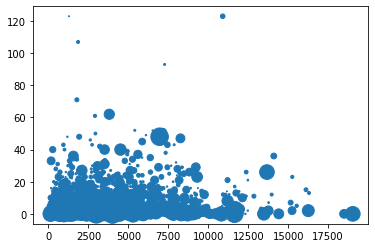

In [4]:
plt.scatter(df['BALANCE'],df['CASH_ADVANCE_TRX'], df['PURCHASES_TRX'])

In [10]:
X = df.drop(['CUST_ID', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT'], axis=1)
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,325.594462,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,275.861322,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,81.270775,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,52.549959,0.250000,6


In [11]:
X.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
print(kmeans.cluster_centers_)

[[2.39495565e+03 9.61720297e-01 5.56031548e+03 3.70040121e+03
  1.86108787e+03 4.79263744e+02 8.99177136e-01 6.76387756e-01
  6.89452407e-01 6.76858770e-02 1.75587703e+00 6.32875226e+01
  5.55137821e+03 3.09615893e-01 1.19330922e+01]
 [5.00949942e+03 8.74321055e-01 1.37767047e+03 8.06778906e+02
  5.71063438e+02 1.04755900e+04 3.53208688e-01 1.97340859e-01
  2.63391180e-01 4.87352031e-01 1.99296875e+01 1.69765625e+01
  1.48443646e+04 1.52979227e-01 1.16562500e+01]
 [4.70429223e+03 9.65599406e-01 6.03651609e+02 3.44867766e+02
  2.58858545e+02 3.38026093e+03 3.39355725e-01 1.53060785e-01
  2.38160820e-01 3.55926079e-01 9.57016899e+00 1.07060985e+01
  2.58015419e+03 2.23738207e-02 1.15304923e+01]
 [5.44820172e+03 9.56126478e-01 2.79165557e+04 2.23543143e+04
  5.56224130e+03 9.70110470e+02 9.05072435e-01 8.50000043e-01
  7.08695609e-01 3.98550435e-02 1.78260870e+00 1.28217391e+02
  2.77616004e+04 5.15316174e-01 1.19130435e+01]
 [8.00083216e+02 8.52818718e-01 6.19293589e+02 3.15063274e+02
  

Text(0, 0.5, 'CASH_ADVANCE')

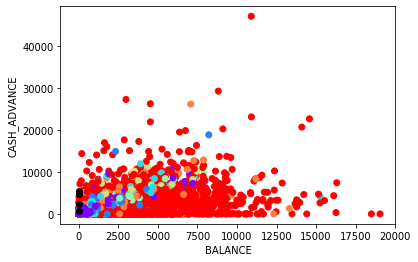

In [29]:
plt.scatter(df['BALANCE'], df['CASH_ADVANCE'], c=df['TENURE'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')
plt.xlabel('BALANCE')
plt.ylabel('CASH_ADVANCE')